In [19]:
# We import the libraries that we will use
import numpy as np #np.nan y mucho mas
import pandas as pd #dataframe y mucho mas
import seaborn as sns #graficos
import matplotlib.pyplot as plt #graficos
from matplotlib.pyplot import figure #graficos 
import plotly as py # graficos 
import re # limpiar columnas 
from collections import Counter # limpiar columnas 
from operator import itemgetter # limpiar columnas

In [20]:
# We customize what we want to see
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [21]:
# We upload the data set, we call it "tiburon"
tiburon_hipotesis = pd.read_csv("/mnt/c/Users/ricar/pruebas/ironhack/Projecto_1/My_repo_Project_1/data-cleaning-pandas/tiburon_hipotesis.csv",encoding = "ISO-8859-1")
tiburon_hipotesis

,date,country,age,sex,fatal,activity,type
0,June,USA,57.0,F,N,surfing,NaN
1,June,USA,11.0,F,N,Close to the water,Unprovoked
2,June,USA,48.0,M,N,surfing,NaN
3,June,AUSTRALIA,NaN,M,N,surfing,Unprovoked
4,June,NaN,NaN,M,N,swimming,Provoked
...,...,...,...,...,...,...,...
6297,NaN,AUSTRALIA,NaN,M,Y,swimming,Unprovoked
6298,NaN,AUSTRALIA,NaN,M,Y,swimming,Unprovoked
6299,NaN,USA,NaN,M,Y,swimming,Unprovoked
6300,NaN,NaN,NaN,M,Y,other activity,Unprovoked


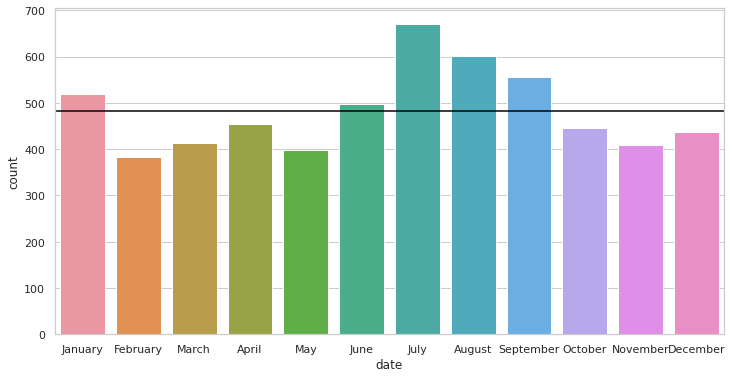

In [46]:
meses = sns.countplot(x=tiburon_hipotesis["date"], order= ["January","February","March","April","May","June","July","August","September","October","November","December"]);
meses.axhline(y=tiburon_hipotesis["date"].count()/12, c="black", label="HORIZONTAL") #Sobre la horizontal marcamos eje y


meses.figure.savefig("plots/meses.jpg")

##### Hipotesis 1: Sharks fatal attacks are more recurrent on men than women


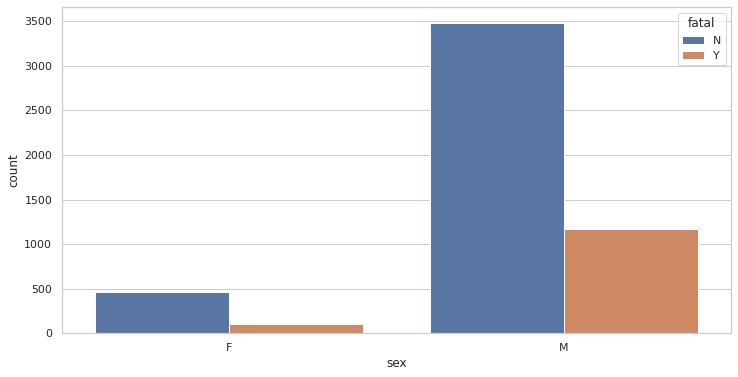

In [47]:
se_fa_graph = sns.countplot(x="sex",  hue="fatal", data=tiburon_hipotesis);
se_fa_graph

se_fa_graph.figure.savefig("plots/se_fa_graph.jpg")

In [48]:
se_fa_group = tiburon_hipotesis.groupby(["fatal"])["sex"].value_counts().unstack()
se_fa_group
print("Male fatal accidents:",(se_fa_group["M"]["Y"]/(se_fa_group["M"]["Y"]+ se_fa_group["M"]["N"])))
print("Female fatal accidents:",(se_fa_group["F"]["Y"]/(se_fa_group["F"]["Y"]+se_fa_group["F"]["N"])))

Male fatal accidents: 0.25203950193215974
Female fatal accidents: 0.18608695652173912


In [49]:
# En el grafico anterior podemos comprobar que hay mas ataques a hombres que a mujeres!! ademas, porcentualmente
# los ataques fatales pa hombres son de 1 de cada 4, mientras que para las mujeres es 1 de cada 5.

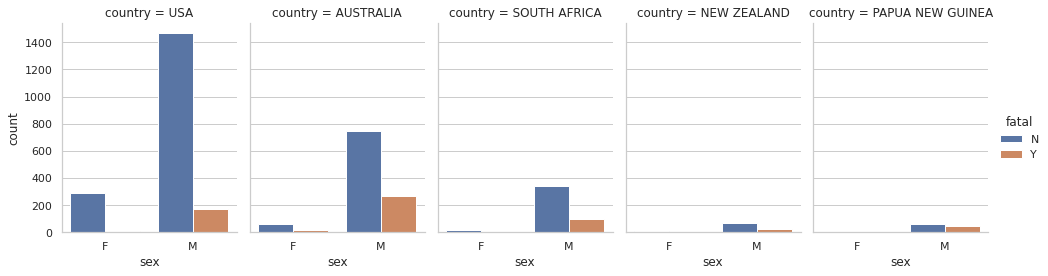

In [50]:
se_fa_co_group = sns.catplot(x="sex", hue="fatal", col="country",
                data=tiburon_hipotesis, kind="count",
                height=4, aspect=.7);
se_fa_co_group
se_fa_co_group.figure.savefig("plots/se_fa_co_group.jpg")

In [51]:
# Pero que tal si queremos ver los ataques fatales por genero entre los paises con mayor muestra?
# Nos damos cuenta de que hay una gran diferencia entre USA y Papua Guinea con respecto a los
# hombres que son atacados y los encuentros fatales. Estudiemos esa diferencia.

In [52]:
se_fa_co=tiburon_hipotesis.groupby(['country','fatal',"sex"]).agg({'date':'count'}).reset_index().rename(columns={"clean_date":"count"})
display(se_fa_co)
print( "Male percentage of fatal attacks Papua New Guinea:", +30/76)
print( "Male percentage of fatal attacks United States:", +151/(1424+151))

,country,fatal,sex,date
0,AUSTRALIA,N,F,62
1,AUSTRALIA,N,M,711
2,AUSTRALIA,Y,F,16
3,AUSTRALIA,Y,M,246
4,NEW ZEALAND,N,F,10
5,NEW ZEALAND,N,M,64
6,NEW ZEALAND,Y,F,2
7,NEW ZEALAND,Y,M,20
8,PAPUA NEW GUINEA,N,F,1
9,PAPUA NEW GUINEA,N,M,46


Male percentage of fatal attacks Papua New Guinea: 0.39473684210526316
Male percentage of fatal attacks United States: 0.09587301587301587


In [53]:
# Como podemos ver, los ataques mortales a hombres en PGN son de 39%!! mientras que en USA son de aprox
# un 10%. Si deseas comparar otros paises, generos o ataques se pueden ver en la tabla de arriba

#### Hipotesis 2: Surfing related activities have the highest fatality ratio ######

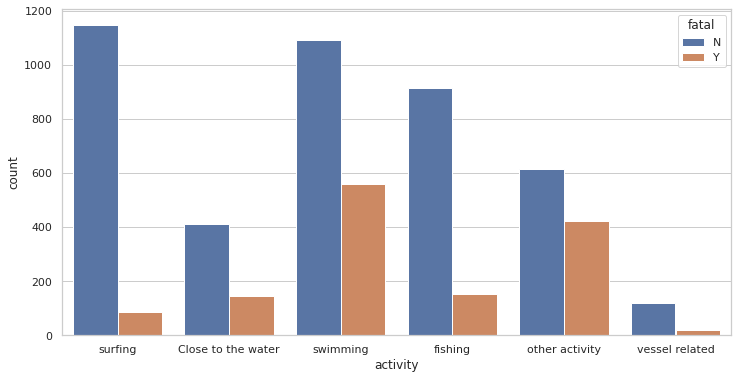

In [45]:
ac_fa_graph = sns.countplot(x="activity",  hue="fatal", data=tiburon_hipotesis);
ac_fa_graph
ac_fa_graph.figure.savefig("plots/ac_fa_graph.jpg")

In [31]:
fa_ac_group = tiburon_hipotesis.groupby(["fatal"])["activity"].value_counts()
fa_ac_group

fatal  activity          
N      surfing               1149
       swimming              1091
       fishing                914
       other activity         616
       Close to the water     412
       vessel related         120
Y      swimming               561
       other activity         423
       fishing                153
       Close to the water     147
       surfing                 86
       vessel related          19
Name: activity, dtype: int64

In [32]:
# como podemos en la tabla, surfing tiene la mayor cantidad de ataques tanto mortales como no en nuestra muestra,
#pero porcentualmente es la mas mortifera!?

In [33]:
act_fat_group = tiburon_hipotesis.groupby(["fatal"])["activity"].value_counts().unstack()
print("Close to the water:",(act_fat_group["Close to the water"]["Y"]/(act_fat_group["Close to the water"]["Y"]+ act_fat_group["Close to the water"]["N"])))
print("fishing:",(act_fat_group["fishing"]["Y"]/(act_fat_group["fishing"]["Y"]+act_fat_group["fishing"]["N"])))
print("surfing:",(act_fat_group["surfing"]["Y"]/(act_fat_group["surfing"]["Y"]+act_fat_group["surfing"]["N"])))
print("swimming:",(act_fat_group["swimming"]["Y"]/(act_fat_group["swimming"]["Y"]+act_fat_group["swimming"]["N"])))
print("vessel related:",(act_fat_group["vessel related"]["Y"]/(act_fat_group["vessel related"]["Y"]+act_fat_group["vessel related"]["N"])))
print("other activity:",(act_fat_group["other activity"]["Y"]/(act_fat_group["other activity"]["Y"]+act_fat_group["other activity"]["N"])))


Close to the water: 0.2629695885509839
fishing: 0.14339268978444236
surfing: 0.06963562753036437
swimming: 0.33958837772397094
vessel related: 0.1366906474820144
other activity: 0.40712223291626565


In [34]:
#H2: pues no! Surfing es de hecho la actividad menos mortifera de todas, mientras que actividades relacionadas
#con nadar son las mas mortiferas.
#Vale acotar que "other activities" posee un 40% de mortalidad, asi que, no hacer locuras en el mar!

###### Hipotesis 3: Shark attacks have a strong relationshi with the age of the those attacked

mean: 27.324838898652608
median: 24.0


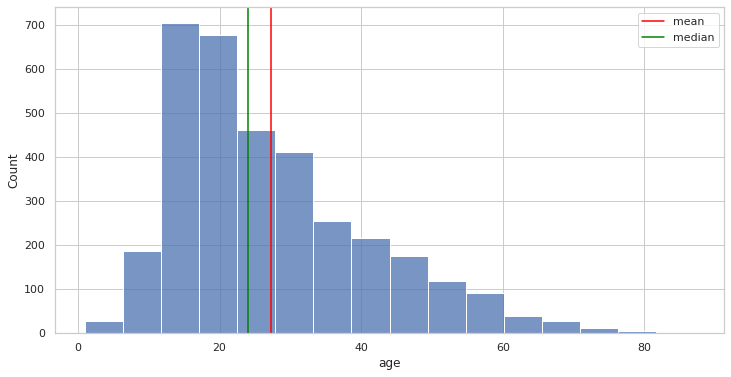

In [54]:
age_hist = sns.histplot(x="age", data = tiburon_hipotesis, bins=16)
age_hist.axvline(x=tiburon_hipotesis.age.mean(), c="red", label="mean")
age_hist.axvline(x=tiburon_hipotesis.age.median(), c="green", label="median")
plt.legend();
print("mean:",tiburon_hipotesis.age.mean())
print("median:",tiburon_hipotesis.age.median())
age_hist.figure.savefig("plots/age_hist.jpg")

In [36]:
# Como esperabamos, los mas jovenes, con una mediana de 24, son los que registraron mayores incidentes

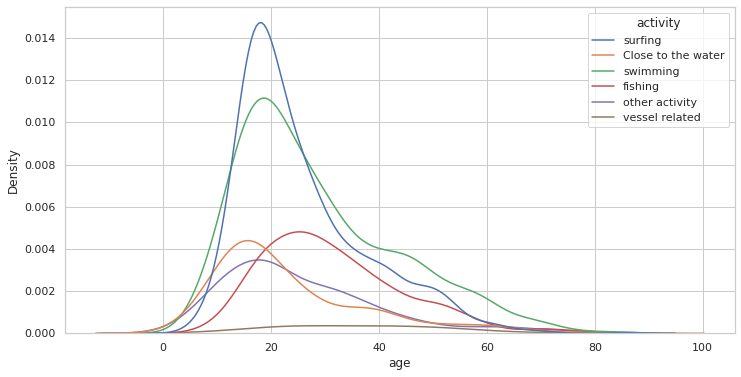

In [55]:
age_kde = sns.kdeplot(x=tiburon_hipotesis.age, hue=tiburon_hipotesis.activity)
age_kde
age_kde.figure.savefig("plots/age_kde.jpg")

In [38]:
# En este grafico logramos ver las actividades que hacen, es increible. Claramente la gente empieza
# a nadar desde pequeño y es de hecho la actividad que mas se mantiene durante el tiempo. Si recuerdan
# esta era la variable que mas ataques mortales tuvo, y es la cual que personas de menor y mayor edad 
# hacen, lo cual puede influenciar en su capacidad de salvarse luego de ser atacados
#Por otro lado podemos ver la cantidad de surfistas jovenes, una mezcla comprensible con los datos

###### Hipotesis 4: There is at least one group of activities that provoke the sharks mroe than others.

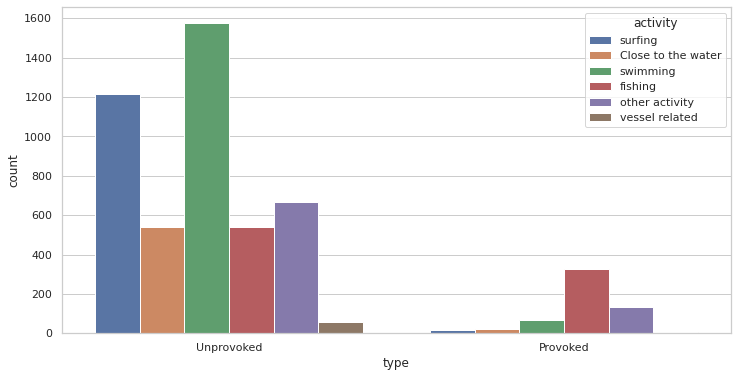

In [56]:
ty_ac_plot = sns.countplot(x="type", hue="activity", data=tiburon_hipotesis);
ty_ac_plot
ty_ac_plot.figure.savefig("plots/ty_ac_plot.jpg")

In [40]:
ty_ac_g = tiburon_hipotesis.groupby(["type"])["activity"].value_counts().unstack()
ty_ac_g

activity,Close to the water,fishing,other activity,surfing,swimming,vessel related
type,,,,,,
Provoked,22,328,136,16,66,6
Unprovoked,539,542,665,1214,1578,57
